# Denoising - using non-local means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import skimage

%matplotlib inline

In [2]:
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means

In [3]:
cat = img_as_float(data.chelsea())

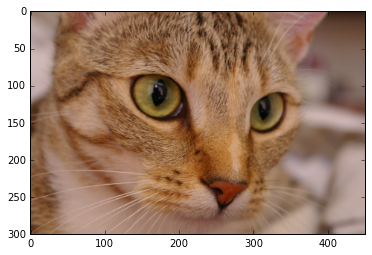

In [4]:
plt.imshow(cat)

In [5]:
noise = cat + 0.4*np.random.random(cat.shape)
noise = np.clip(noise, 0, 1)

In [6]:
x = np.arange(15)

In [7]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [8]:
np.clip(x, 3, 9)

array([3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9])

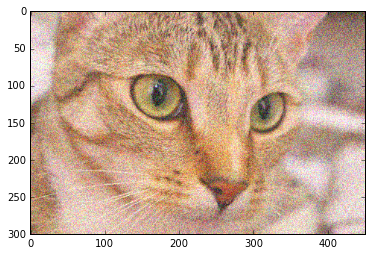

In [9]:
plt.imshow(noise)

In [10]:
denoise = denoise_nl_means(noise, 7, 11, 0.1, multichannel=True)

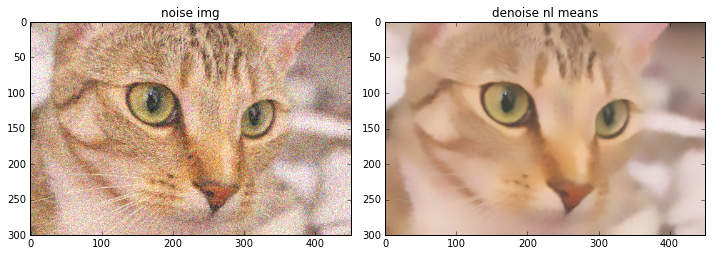

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10,6))

axes[0].imshow(noise)
axes[0].set_title('noise img')
axes[1].imshow(denoise)
axes[1].set_title('denoise nl means')

fig.tight_layout()

plt.show()

# RANSAC 

In [12]:
# random sample consensus - used to detect outliers

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import skimage

%matplotlib inline

In [25]:
from skimage.measure import ransac

np.random.seed(seed=3)

In [20]:
x = np.arange(-300, 300)
y = 0.5*x + 50

data = np.column_stack([x,y])

data_faulty = np.array(40* [(200.0, -130)])
data_faulty += 4 * np.random.normal(size=data_faulty.shape)
data_faulty = data[:data_faulty.shape[0]]

In [21]:
data_noise = np.random.normal(size=data.shape)

data += 2* data_noise
data[::2] += 3*data_noise[::2]
data[::5] += 15*data_noise[::5]

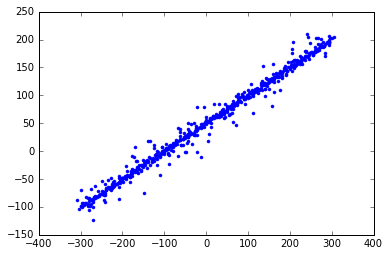

In [22]:
plt.plot(data[:,0], data[:,1], '.')

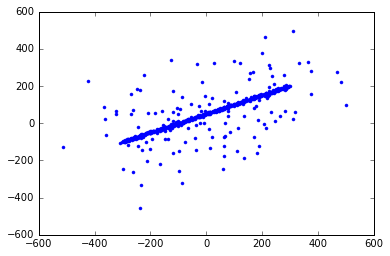

In [29]:
x=np.arange(-300,300)
y=0.5*x + 50
data = np.column_stack([x,y])

faulty = np.array(40*[(200.0, -130)])
faulty += 4*np.random.normal(size=faulty.shape)
faulty = data[:faulty.shape[0]]

noise = np.random.normal(size=data.shape)
data += 2*noise
data[::2] += 3*noise[::2]
data[::5] += 150*noise[::5]

plt.plot(data[:,0], data[:,1], '.')

In [30]:
from skimage.measure import LineModelND

In [31]:
nd_model = LineModelND()
nd_model.estimate(data)
nd_model.params

(array([  0.61781201,  48.82745104]), array([ 0.88487196,  0.46583431]))

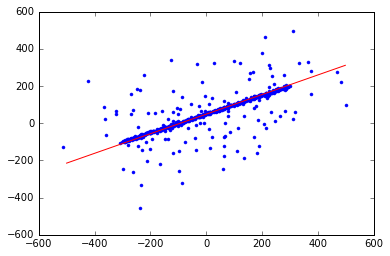

In [34]:
orig, direc = nd_model.params
plt.plot(data[:,0], data[:,1], '.')
plt.plot(x1, nd_model.predict_y(x1), 'r-')

In [32]:
x1 = np.arange(-500, 500)

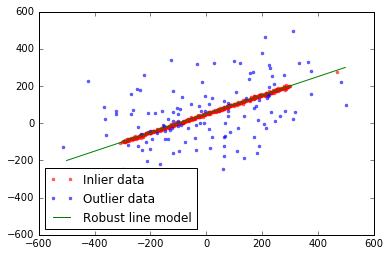

In [37]:
model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                               residual_threshold=10, max_trials=1500)
outliers = (inliers == False)

yy = model_robust.predict_y(x1)

fig, ax = plt.subplots()

ax.plot(data[inliers, 0], data[inliers, 1], '.r', alpha=0.6, label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.b', alpha=0.6, label='Outlier data')
ax.plot(x1, yy, '-g', label='Robust line model')

plt.legend(loc='lower left')
plt.show()

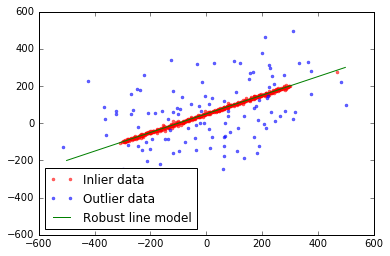

In [38]:
model_robust, inliers = ransac(data, LineModelND, min_samples=3,
                               residual_threshold=16, max_trials=2000)
outliers = (inliers == False)

yy = model_robust.predict_y(x1)

fig, ax = plt.subplots()

ax.plot(data[inliers, 0], data[inliers, 1], '.r', alpha=0.6, label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.b', alpha=0.6, label='Outlier data')
ax.plot(x1, yy, '-g', label='Robust line model')

plt.legend(loc='lower left')
plt.show()